In [1]:
## Pass in any dtg into the sendIt function. Example: sendIt(dec2024)

import pandas as pd

def sendIt(dtg): ## enter dtg as 'apr2024', for example
    path = "Downloads/" + dtg + "Jupy.csv"
    df = pd.read_csv(path)
    df.dropna(inplace = True)
    df.columns=["DATE", "AMT", "CLASS",]
    df.reset_index(drop=True, inplace=True) # Reset the index and DROP the old index column

    df2 = df[['AMT', 'CLASS']].copy()

    df2= df2.drop(df2.index[0])

    df2['AMT'] = pd.to_numeric(df2['AMT'])

    incoTot = df2.loc[df2['CLASS'] == 'INCO', 'AMT'].sum()

    incoTot = incoTot.round(2)

    typeArr, totalArr = [], []

    for elem in df2['CLASS'].unique():
        total = (df2.loc[df2['CLASS'] == elem, 'AMT'].sum()).round(2)
        print(elem + ": $" + str(total))
        if elem != "INCO":
            typeArr.append(elem)
            totalArr.append(total)
    #print(typeArr)
    #print(totalArr)
    expenses = pd.DataFrame({"type": typeArr, "total": totalArr})


    import matplotlib.pyplot as plt

    def serra(pct):
        total = sum(expenses['total'])
        val = int(round(pct*total/100.0))
        return '({v:d})'.format(p=pct,v=val)

    # Plot a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(expenses['total'], labels=expenses['type'], autopct=serra, startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(dtg.upper() + " EXPENSES\n\n")
    print(dtg.upper() + ": INCO = $" + str(incoTot.round(2)))
    print(dtg.upper() + ": EXPENSES = $" + str(expenses['total'].sum().round(2))) 
    print(dtg.upper() + " INCO - EXP = $" + str((incoTot - expenses['total'].sum()).round(2)))
    plt.show()

    
## For testing:
## sendIt("mar2024")

INCO: $3327.0
GROCERY: $317.5
EDU: $203.49
FUN: $443.22
INTERNET: $57.44
TRANS: $81.6
CHAOS: $75.06
MAR2024: INCO = $3327.0
MAR2024: EXPENSES = $1178.31
MAR2024 INCO - EXP = $2148.69


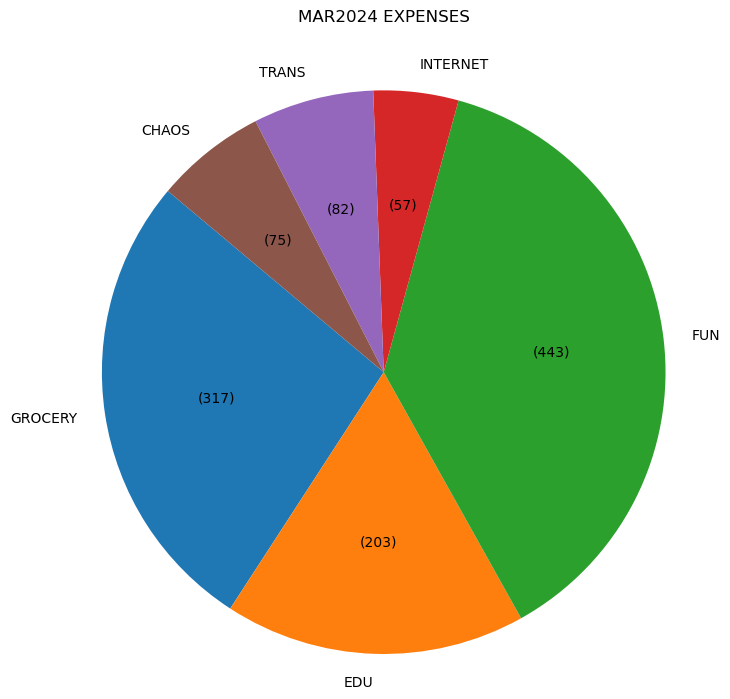